# Importing Packages

In [293]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing

In [294]:
orig_data=pd.read_csv("bank.csv",sep=';',delimiter=';')

In [295]:
orig_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [296]:
orig_data=orig_data.drop('duration',axis=1)

In [297]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(6), object(10)
memory usage: 565.2+ KB


In [298]:
orig_data.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [299]:
categorical_features_to_encode=['job','marital','contact','poutcome']

In [300]:
orig_data=pd.get_dummies(orig_data,columns=categorical_features_to_encode)

In [301]:
#Encoding education,loan,default,housing
orig_data['education'][orig_data['education']=='unknown']=0
orig_data['education'][orig_data['education']=='primary']=1
orig_data['education'][orig_data['education']=='secondary']=2
orig_data['education'][orig_data['education']=='tertiary']=3
orig_data['default'][orig_data['default']=='no']=0
orig_data['default'][orig_data['default']=='yes']=1
orig_data['housing'][orig_data['housing']=='no']=0
orig_data['loan'][orig_data['loan']=='yes']=1
orig_data['housing'][orig_data['housing']=='yes']=1
orig_data['loan'][orig_data['loan']=='no']=0

In [302]:
#Encodint Months
orig_data['month'][orig_data['month']=='jan']=1
orig_data['month'][orig_data['month']=='feb']=2
orig_data['month'][orig_data['month']=='mar']=3
orig_data['month'][orig_data['month']=='apr']=4
orig_data['month'][orig_data['month']=='may']=5
orig_data['month'][orig_data['month']=='jun']=6
orig_data['month'][orig_data['month']=='jul']=7
orig_data['month'][orig_data['month']=='aug']=8
orig_data['month'][orig_data['month']=='sep']=9
orig_data['month'][orig_data['month']=='oct']=10
orig_data['month'][orig_data['month']=='nov']=11
orig_data['month'][orig_data['month']=='dec']=12

In [303]:
orig_data['pdays'][orig_data.pdays==-1]=9999

In [304]:
#Combining two features to form a new feature
orig_data['date']=orig_data.month+orig_data.day/31
orig_data=orig_data.drop(columns=['month','day'],axis=1)

In [305]:
columns_to_scale=['age','balance','pdays','campaign','previous','date']

In [306]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(orig_data[columns_to_scale])
scaled_data=scaler.transform(orig_data[columns_to_scale])
scaled_data_pd=pd.DataFrame(scaled_data,columns=columns_to_scale)
orig_data_1=orig_data.drop(columns=columns_to_scale,axis=1)

In [307]:
scaled_data_pd.head()

,age,balance,pdays,campaign,previous,date
0,0.161765,0.068455,1.000000,0.000000,0.00,0.797260
1,0.205882,0.108750,0.033807,0.000000,0.16,0.350685
2,0.235294,0.062590,0.032907,0.000000,0.04,0.279452
3,0.161765,0.064281,1.000000,0.061224,0.00,0.413699
4,0.588235,0.044469,1.000000,0.000000,0.00,0.334247


In [308]:
final_data = pd.concat([scaled_data_pd, orig_data_1], axis=1)

In [309]:
final_data['y'][final_data.y=='no']=0
final_data['y'][final_data.y=='yes']=1
X=final_data.drop(columns='y',axis=1)
y=final_data.y
y=y.astype('int')

# Correlation Matrix



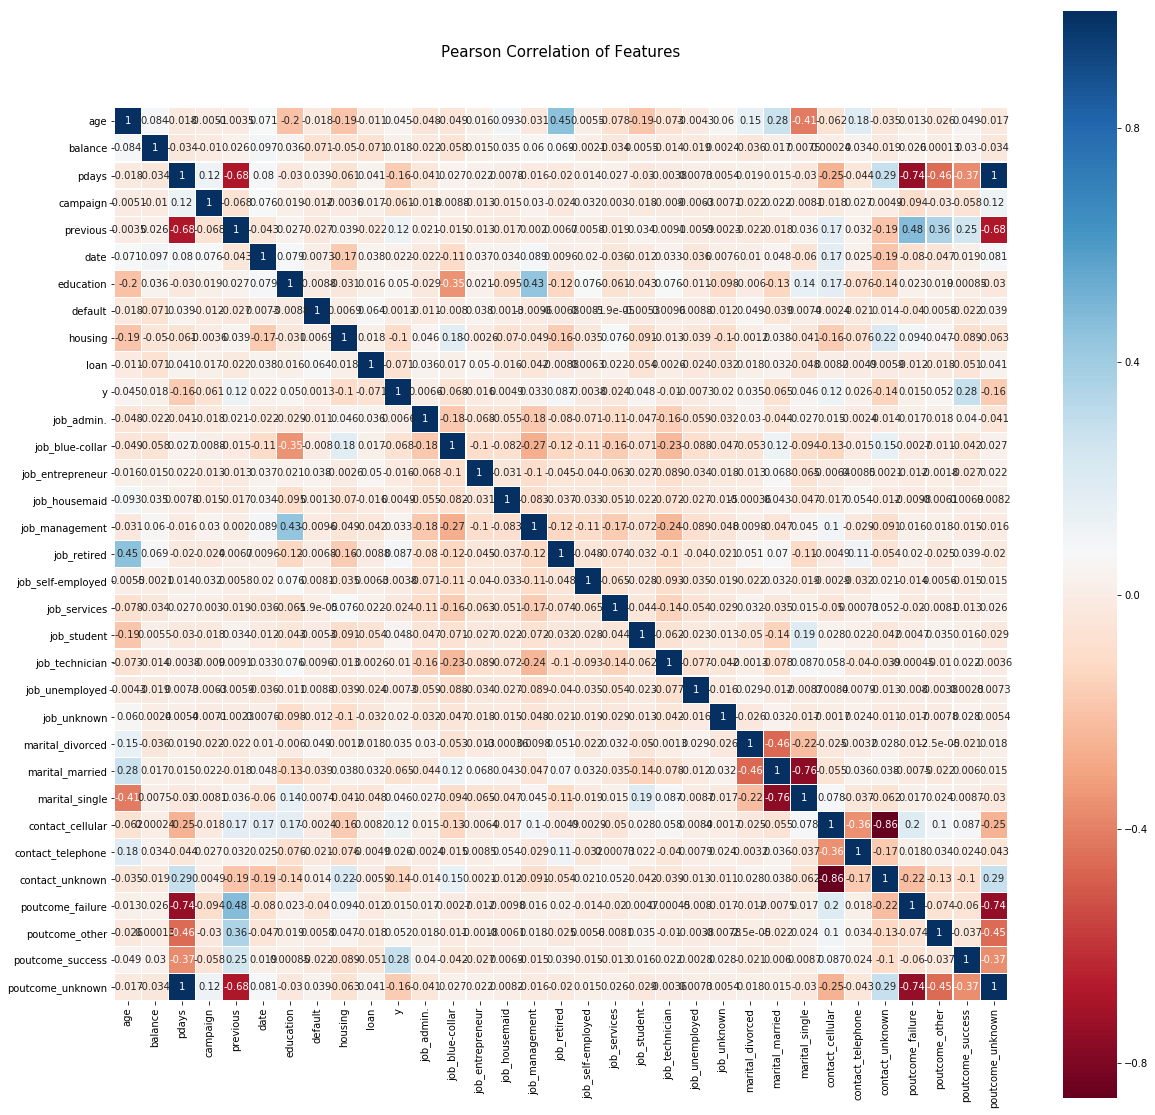

In [310]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(final_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Running Models

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [312]:
from sklearn.metrics import  roc_auc_score,roc_curve

  # 1.Naive Bayes

In [313]:
gnb = GaussianNB().fit(X_train,y_train)
print("Training accuracy:"+str(accuracy_score(gnb .predict(X_train),y_train)))
print("Validation accuracy:"+str(accuracy_score(gnb .predict(X_test),y_test)))
print("training AUC="+str(roc_auc_score(y_train, gnb.predict_proba(X_train)[::,1])))
print("validation AUC="+str(roc_auc_score(y_test, gnb.predict_proba(X_test)[::,1])))

Training accuracy:0.7979351032448377
Validation accuracy:0.7948717948717948
training AUC=0.7094455843241314
validation AUC=0.6843374636951413


In [314]:
gnb = GaussianNB().fit(X,y)

In [315]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Naive Bayes:")
print("Accuracy="+str(accuracy_score(gnb.predict(X),y)))
print(confusion_matrix(gnb.predict(X), y))
print(classification_report(gnb.predict(X), y))

Naive Bayes:
Accuracy=0.8002654280026543
[[3404  307]
 [ 596  214]]
             precision    recall  f1-score   support

          0       0.85      0.92      0.88      3711
          1       0.41      0.26      0.32       810

avg / total       0.77      0.80      0.78      4521



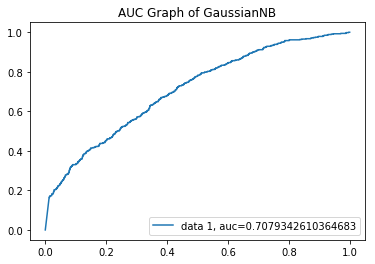

In [316]:
y_pred_proba = gnb.predict_proba(X)[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC Graph of GaussianNB")
plt.show()

# 2.Decision Tree

In [317]:
depth=[1,3,5,7,10,12,15,20]
train_accuracy=[]
test_accuracy=[]
for i in depth:
    clf = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
    train_accuracy.append(accuracy_score(clf.predict(X_train),y_train))
    test_accuracy.append(accuracy_score(clf.predict(X_test),y_test))
    print("for max_depth="+str(i))
    print("training data accuracy:"+str(accuracy_score(clf.predict(X_train),y_train)))
    print("validation accuracy:"+str(accuracy_score(clf.predict(X_test),y_test)))
    print("training AUC="+str(roc_auc_score(y_train, clf.predict_proba(X_train)[::,1])))
    print("validation AUC="+str(roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])))
    print("==============================================")

for max_depth=1
training data accuracy:0.8926253687315634
validation accuracy:0.8938992042440318
training AUC=0.5715115557172515
validation AUC=0.5808157099697886
for max_depth=3
training data accuracy:0.8941002949852508
validation accuracy:0.8930150309460654
training AUC=0.6693402947517585
validation AUC=0.6560306201380679
for max_depth=5
training data accuracy:0.9035398230088496
validation accuracy:0.8797524314765695
training AUC=0.7083167995304256
validation AUC=0.6526664915276501
for max_depth=7
training data accuracy:0.9135693215339233
validation accuracy:0.8797524314765695
training AUC=0.7491861895785378
validation AUC=0.5945531765839134
for max_depth=10
training data accuracy:0.928023598820059
validation accuracy:0.8770999115826702
training AUC=0.8240363433971735
validation AUC=0.5756855962753769
for max_depth=12
training data accuracy:0.9365781710914455
validation accuracy:0.8717948717948718
training AUC=0.8661287283544661
validation AUC=0.5737116336091773
for max_depth=15
trai

In [318]:
dec=DecisionTreeClassifier(max_depth=3).fit(X,y)

In [319]:

print("Decision Tree:")
print("Accuracy="+str(accuracy_score(dec.predict(X),y)))
print(confusion_matrix(dec.predict(X), y))
print(classification_report(dec.predict(X), y))

Decision Tree:
Accuracy=0.8942711789427118
[[3949  427]
 [  51   94]]
             precision    recall  f1-score   support

          0       0.99      0.90      0.94      4376
          1       0.18      0.65      0.28       145

avg / total       0.96      0.89      0.92      4521



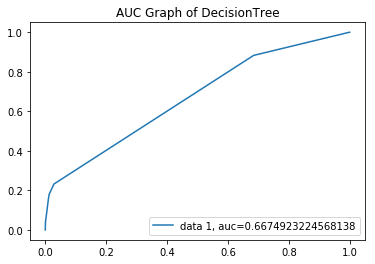

In [320]:
y_pred_proba = dec.predict_proba(X)[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC Graph of DecisionTree")
plt.show()

# 3.RandomForest

In [321]:
depth=[1,3,5,7,10,12,15,20]
train_accuracy=[]
test_accuracy=[]
for i in depth:
    clf = RandomForestClassifier(max_depth=i,criterion='gini').fit(X_train,y_train)
    train_accuracy.append(accuracy_score(clf.predict(X_train),y_train))
    test_accuracy.append(accuracy_score(clf.predict(X_test),y_test))
    print("for max_depth"+str(i))
    print("training data accuracy:"+str(accuracy_score(clf.predict(X_train),y_train)))
    print("validation accuracy:"+str(accuracy_score(clf.predict(X_test),y_test)))
    print("training AUC="+str(roc_auc_score(y_train, clf.predict_proba(X_train)[::,1])))
    print("validation AUC="+str(roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])))
    print("==============================================")

for max_depth1
training data accuracy:0.8870206489675516
validation accuracy:0.8779840848806366
training AUC=0.6625028979378838
validation AUC=0.6643716158033773
for max_depth3
training data accuracy:0.8914454277286136
validation accuracy:0.8797524314765695
training AUC=0.7371307679817588
validation AUC=0.7321394690368814
for max_depth5
training data accuracy:0.8994100294985251
validation accuracy:0.8841732979664014
training AUC=0.7759935259850601
validation AUC=0.7293262985828334
for max_depth7
training data accuracy:0.9023598820058997
validation accuracy:0.8859416445623343
training AUC=0.8405678308489938
validation AUC=0.7068610709750864
for max_depth10
training data accuracy:0.9168141592920354
validation accuracy:0.8841732979664014
training AUC=0.9212876655948998
validation AUC=0.7374848577725237
for max_depth12
training data accuracy:0.9277286135693216
validation accuracy:0.8859416445623343
training AUC=0.9609939731574977
validation AUC=0.7007567465008684
for max_depth15
training d

In [322]:
rnd=RandomForestClassifier(max_depth=3).fit(X,y)

print("Random Forest :")
print("Accuracy="+str(accuracy_score(rnd.predict(X),y)))
print(confusion_matrix(rnd.predict(X), y))
print(classification_report(rnd.predict(X), y))

Random Forest :
Accuracy=0.8942711789427118
[[3980  458]
 [  20   63]]
             precision    recall  f1-score   support

          0       0.99      0.90      0.94      4438
          1       0.12      0.76      0.21        83

avg / total       0.98      0.89      0.93      4521



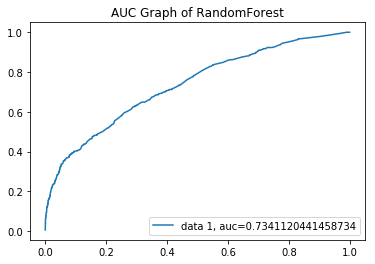

In [323]:
y_pred_proba = rnd.predict_proba(X)[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC Graph of RandomForest")
plt.show()

# Bagging With Decion Tree

In [324]:
from sklearn.ensemble import BaggingClassifier

In [325]:
clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5)).fit(X_train,y_train)
print("validation AUC="+str(roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])))
print("training AUC="+str(roc_auc_score(y_train, clf.predict_proba(X_train)[::,1])))

validation AUC=0.7430674139264708
training AUC=0.7806054801633437


In [326]:
bag=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5)).fit(X,y)

In [327]:

print("BaggingClassifier with DecsionTree with max_depth=5 :")
print("Accuracy="+str(accuracy_score(bag.predict(X),y)))
print(confusion_matrix(bag.predict(X), y))
print(classification_report(bag.predict(X), y))

BaggingClassifier with DecsionTree with max_depth=5 :
Accuracy=0.9009068790090687
[[3982  430]
 [  18   91]]
             precision    recall  f1-score   support

          0       1.00      0.90      0.95      4412
          1       0.17      0.83      0.29       109

avg / total       0.98      0.90      0.93      4521



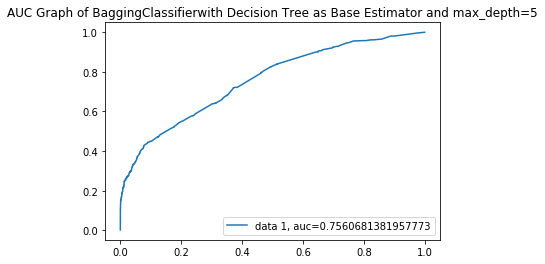

In [328]:
y_pred_proba = bag.predict_proba(X)[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC Graph of BaggingClassifierwith Decision Tree as Base Estimator and max_depth=5")
plt.show()

In [329]:
clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=40)).fit(X_train,y_train)
print("validation AUC="+str(roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])))
print("training AUC="+str(roc_auc_score(y_train, clf.predict_proba(X_train)[::,1])))

validation AUC=0.633452281915437
training AUC=0.9996253302780892


In [330]:
bag_1=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=40)).fit(X,y)

In [331]:
print("BaggingClassifier with DecsionTree with max_depth=40 :")
print("Accuracy="+str(accuracy_score(bag_1.predict(X),y)))
print(confusion_matrix(bag_1.predict(X), y))
print(classification_report(bag_1.predict(X), y))

BaggingClassifier with DecsionTree with max_depth=40 :
Accuracy=0.9827471798274718
[[3997   75]
 [   3  446]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      4072
          1       0.86      0.99      0.92       449

avg / total       0.99      0.98      0.98      4521



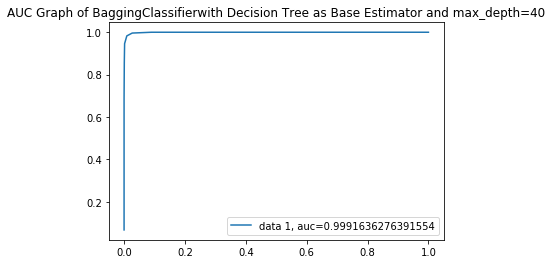

In [332]:
y_pred_proba = bag_1.predict_proba(X)[::,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC Graph of BaggingClassifierwith Decision Tree as Base Estimator and max_depth=40")
plt.show()